A notebook for capturing MTF chart image data for each channel of OROS (the OROCHI Simulator).

# Process Overview

- Find Exposure time - aim for 3000 DN exposure, for SNR of ~120.
- Set target in position
- Capture 25 repeat images, save the average and standard deviation
- Capture dark images at the given exposures.

# Setup

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import orochi_sim_ctrl as osc

In [23]:
ic = osc.start_ic()
camera_config = osc.load_camera_config()
cameras = osc.connect_cameras(ic, camera_config)
osc.configure_cameras(cameras)

Device 0 (DMK 33GX249 10910288) succesfully connected.
Device 1 (DMK 33GX249 10910273) succesfully connected.
Device 2 (DMK 33GX249 10910289) succesfully connected.
Device 3 (DMK 33GX249 10910294) succesfully connected.
Device 4 (DMK 33GX249 10910291) succesfully connected.
Device 5 (DMK 33GX249 10910295) succesfully connected.
Device 7 (DMK 33GX249 23120778) succesfully connected.
Device 6 (DMK 33GX249 10910265) succesfully connected.
-----------------------------------
Device 0 (DMK 33GX249 10910288)
-----------------------------------
1
Video Format set to : Y16 (1920x1200)
1
Sink Format set to : "SinkFormats.Y16"
Setting Frame Rate to : 30.0 FPS
set frame rate err: 1
Frame Rate set to : 33 FPS
Brightness Value set to 0
Contrast Value set to 0
Sharpness Value set to 0
Gamma Value set to 100
Gain Value set to 4.269999980926514
Gain Auto set to 0
Exposure Value set to 0.009999999776482582
Exposure Auto set to 1
Exposure Auto Reference set to 80
Exposure Auto Max Value set to 10.0
Expo

In [ ]:
osc.check_channel_roi_uniformity(cameras)

# Find Exposures

In [24]:
mtf_exposures = osc.find_channel_exposures(cameras, init_t_exp=0.4, target=0.73, n_hot=100,tol=10, limit=5, roi=True)

-----------------------------------
Device 0
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.4000000059604645
Trial 0:
Imaging with Exposure: 0.4000000059604645 s
+Good exposure 0.4000000059604645 Image recieved
Quantile: 4094.0, Target: 2988.62
Exposure current Value: 0.4000000059604645
Exposure Value set to 0.058400001376867294
Exposure set to 0.058400001376867294 (err of -5.066394873076696e-10
Trial 1:
Imaging with Exposure: 0.058400001376867294 s
+Good exposure 0.058400001376867294 Image recieved
Quantile: 4094.0, Target: 2988.62
Exposure current Value: 0.058400001376867294
Exposure Value set to 0.008526400662958622
Exposure set to 0.008526000194251537 (err of 4.000067710865224e-07
Trial 2:
Imaging with Exposure: 0.008526000194251537 s
+Good exposure 0.008526000194251537 Image recieved
Quantile: 1423.0, Target: 2988.62
Exposure current Value: 0.008526000194251537
Exposure Value set to 0.017906516790390015
Exposure set to 0.01790

# Capture Illuminated Images

In [25]:
subject = 'mtf_7_illum_22062023'
check_stk = {}
for camera in cameras:
    t_exp = mtf_exposures[camera.name]
    camera.set_exposure(t_exp)
    ave, std = camera.image_capture_repeat(n=25, roi=True)
    print(ave.shape)
    check_stk[camera.name] = ave
    name = f'mtf_1_{camera.name}_ave'
    camera.save_image(name, subject, 'ave', ave)
    name = f'mtf_1_{camera.name}_std'
    camera.save_image(name, subject, 'std', std)    

Exposure Auto set to 0
Exposure Value set to 0.01809700019657612
True
Imaging with Exposure: 0.01809700019657612 s
+Good exposure 0.01809700019657612 Image recieved
Imaging with Exposure: 0.01809700019657612 s
+Good exposure 0.01809700019657612 Image recieved
Imaging with Exposure: 0.01809700019657612 s
+Good exposure 0.01809700019657612 Image recieved
Imaging with Exposure: 0.01809700019657612 s
+Good exposure 0.01809700019657612 Image recieved
Imaging with Exposure: 0.01809700019657612 s
+Good exposure 0.01809700019657612 Image recieved
Imaging with Exposure: 0.01809700019657612 s
+Good exposure 0.01809700019657612 Image recieved
Imaging with Exposure: 0.01809700019657612 s
+Good exposure 0.01809700019657612 Image recieved
Imaging with Exposure: 0.01809700019657612 s
+Good exposure 0.01809700019657612 Image recieved
Imaging with Exposure: 0.01809700019657612 s
+Good exposure 0.01809700019657612 Image recieved
Imaging with Exposure: 0.01809700019657612 s
+Good exposure 0.0180970001965

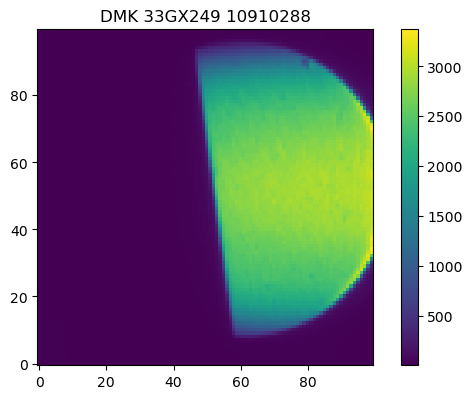

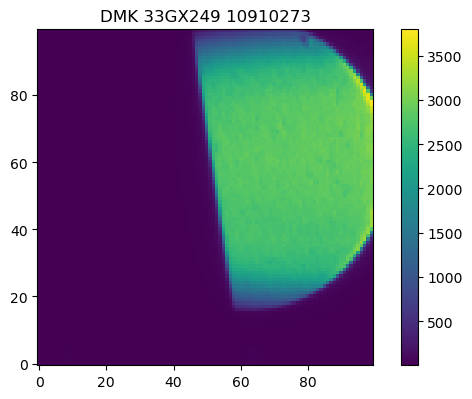

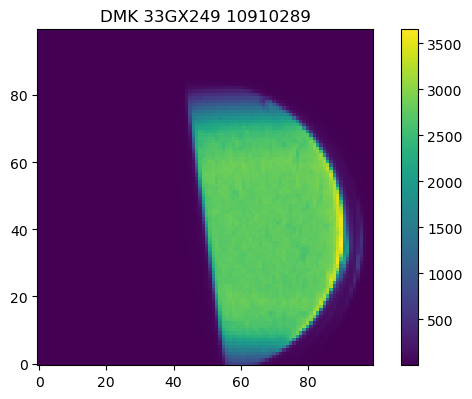

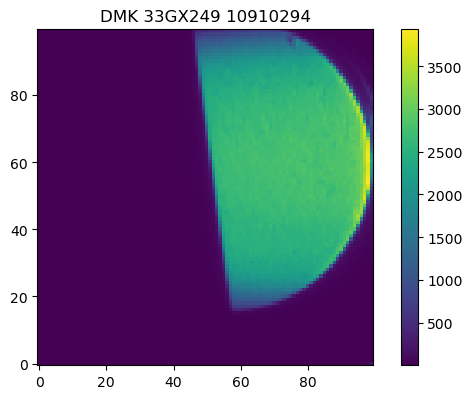

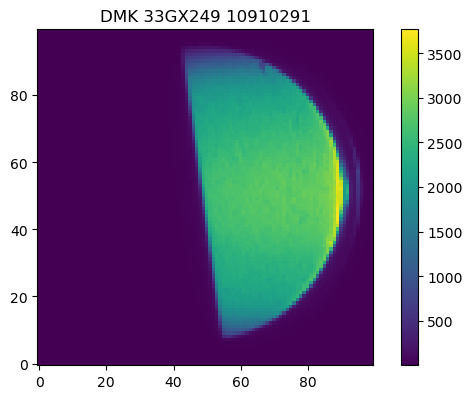

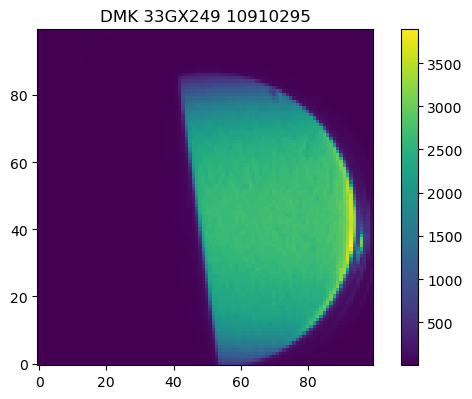

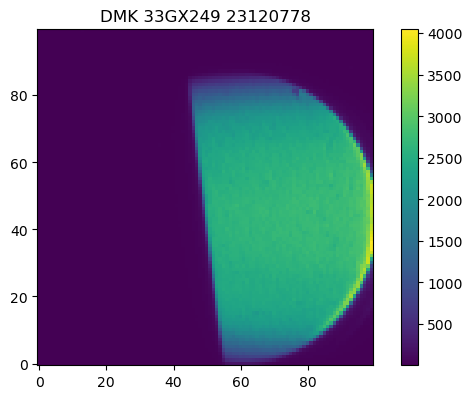

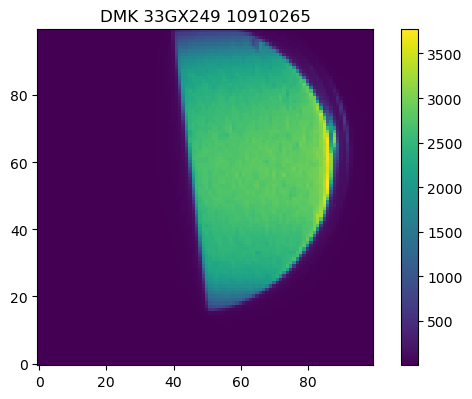

In [26]:
for camera in cameras:
    img = check_stk[camera.name]
    camera.show_image(img, camera.name)

# Capture Dark Images

In [27]:
subject = 'mtf_7_dark_26062023'
for camera in cameras:
    t_exp = mtf_exposures[camera.name]
    camera.set_exposure(t_exp)
    ave, std = camera.image_capture_repeat(n=25)
    name = f'dark_{camera.name}_ave'
    camera.save_image(name, subject, 'ave', ave)
    name = f'dark_{camera.name}_std'
    camera.save_image(name, subject, 'std', std)    

Exposure Auto set to 0
Exposure Value set to 0.01809700019657612
True
Imaging with Exposure: 0.01809700019657612 s
+Good exposure 0.01809700019657612 Image recieved
Imaging with Exposure: 0.01809700019657612 s
+Good exposure 0.01809700019657612 Image recieved
Imaging with Exposure: 0.01809700019657612 s
+Good exposure 0.01809700019657612 Image recieved
Imaging with Exposure: 0.01809700019657612 s
+Good exposure 0.01809700019657612 Image recieved
Imaging with Exposure: 0.01809700019657612 s
+Good exposure 0.01809700019657612 Image recieved
Imaging with Exposure: 0.01809700019657612 s
+Good exposure 0.01809700019657612 Image recieved
Imaging with Exposure: 0.01809700019657612 s
+Good exposure 0.01809700019657612 Image recieved
Imaging with Exposure: 0.01809700019657612 s
+Good exposure 0.01809700019657612 Image recieved
Imaging with Exposure: 0.01809700019657612 s
+Good exposure 0.01809700019657612 Image recieved
Imaging with Exposure: 0.01809700019657612 s
+Good exposure 0.0180970001965